# Études techniques 

## Notebook configuration and imports

### Import librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
%matplotlib inline

# import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 238)

## Data description 

In [4]:
data = pd.read_excel(r"C:\Users\Nathan\Desktop\Etude technique\baseMinesAles.xlsx")

In [5]:
data.dropna(axis=1, how='all', inplace = True)
data.dropna(axis=0, how='all', inplace = True)
data.drop(['Unnamed: 236', 'Unnamed: 237'], axis = 1, inplace = True)
data.head()

,Numéro,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,DatedebutdiagnosticTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,nomlaxatifActuel,NbrdelaxatifjourActuel,utilisationActuelDiurétique,nomDiuretiqueActuel,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,nomlaxatifPasse,NbrdelaxatifjourPasse,AnorexiedetyperestrictifPasse,switch,nombreFracture,DateFracture1,LocalisationFracture1,FracturedefaibleeNRJ1,DateFracture2,LocalisationFracture2,FracturedefaibleeNRJ2,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Pathologiesassociées,DatedudiagnosticPathologie,traitement,Autres renseignement nutrition,Agedelamenarche,amenorheprimaire,traitementcontraceptif,NomTraitementContraceptif,Datedebutcontraceptif,estro,Cyclesréguliers,SicyclesirréguliersNbrcycles/an,Datedernièresmenstruations,épisoderegle,épisoded'amenorhee (age début et age fin),Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,PeriodeArret,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiqueActuelPratriquee2,ActivitePhysiqueActuelPratriquee2NbrHsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,ActivitePhysiquePassePratriquee2,ActivitePhysiquePassePratriquee2NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),VE (l/min),Lip(%),Glu(%),Pro(%),npRQ,AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,CMOBrasG,CMOBrasD,CMO2Bras,DMOBrasG,DMOBrasD,DMO2Bras,CMOBassinT1,DMOBassinT1,CMOJambeG,CMOJambeD,CMO2Jambes,DMOJambesG,DMOJambesD,DMO2JambesT1,CMOSoustotalT1,DMOSoustotalT1,CMOTeteT1,DMOTeteT1,CMOCorpstotalT1,DMOCorpstotalT1,CorpstotalTscoreSD,CorpstotalTscorepc,CorpstotalZscoreSD,CorpstotalZscorepc,CMOL1L4T1,DMOL1L4T1,L1L4TscoreSD,L1L4Tscorepc,L1L4ZscoreSD,L1L4Zscorepc,CMOCol,DMOCol,CMOTroch,DMOTroch,CMOIntertroch,DMOIntertroch,CMOWard,DMOWard,CMOESFPT,DMOESFPT,ESFPTscoreSD,ESFPTscoreT1pc,ESFPZscoreSD,ESFPZscorepc,CMORadiusT1,DMORadiusT1,radiusTscoreSD,radiusTscoreSDpc,radiusZscoreSD,radiusZscorepc,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,LeptineT1,LeptineMGtotale,recepteurlepine,IGF1T1,IGFBP3T1,ratioIGF1IGFBP3,FSH (mIU/ml),LH (mIU/ml),Estradiol (pg/ml),TSH(mIU/l),T4(ng/dl),T3(pg/dl),Insuline,sclerostine,DKK1,folates plasmatiques nmol/l,folates erythrocytaires nmol/l,vitamine b12 pmol/l,vitamine A micro mol/l,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,ration patient kcal/j,Glucose (mmol/l)
0,1,16.586301,2008-11-28,1992-05-02,28881.7,-4.0,168.0,1.0,10.233029,26.0,-4.2,9.212018,16.463014,2008-10-14 00:00:00,48.0,-0.5,17.006803,15.460274,2007-10-14 00:00:00,38,2007-10-14 00:00:00,15.460274,1.126027,2007-10-14 00:00:00,non,0,non,NaN,NaN,non,NaN,oui,non,0.0,non,NaN,0,oui,NaN,0.0,NaN,NaN,.,NaN,NaN,NaN,0.0,0,0,"Bradycardie, cytolyse hepathique, insuffisance...",.,0,NaN,NaN,Non,non,NaN,NaN,NaN,non,0,2008-03-01 00:00:00,NaN,NaN,9.066667,non,.,0.0,0,non,aucune,0,aucune,.,aucune,0,aucune,0,900,-23,0.91,131.0,120.0,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.28,94.71,92.995,0.593,0.594,0.5935,173.58,0.802,298.03,304.49,301.260,0.936,0.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Columns: 210 entries, Numéro to Glucose (mmol/l)
dtypes: datetime64[ns](2), float64(116), object(92)
memory usage: 602.2+ KB


In [7]:
data.columns = data.columns.str.strip()

## Data preprocessing

Exemple d'inconsistence à la casse :

In [8]:
data['Cyclesréguliers'] = data['Cyclesréguliers'].str.replace("noin", "non")
data['Cyclesréguliers'].unique()

array(['non', 'oui', 'Non', nan], dtype=object)

### Missing values

In [9]:
print("Nombre de colonnes :", data.shape[1])

Nombre de colonnes : 210


In [10]:
# Liste des colonnes à supprimer dû à un manque de données conséquents
column_to_drop = ["nomDiuretiqueActuel", "ratioIGF1IGFBP3", "DateFracture2", "LocalisationFracture2", "FracturedefaibleeNRJ2", "nomlaxatifActuel", "nomlaxatifPasse", "T4(ng/dl)", "Estradiol (pg/ml)", "épisoderegle", "FSH (mIU/ml)", "LH (mIU/ml)", "Autres renseignement nutrition",
"T3(pg/dl)", "recepteurlepine", "épisoded'amenorhee (age début et age fin)", "DatedudiagnosticPathologie", "PeriodeArret", "switch", "DateFracture1", "sclerostine", "DKK1", "LocalisationFracture1", "IGFBP3T1", "IGF1T1", "estro", "Datedebutcontraceptif", "NomTraitementContraceptif", "ration patient kcal/j",
"LeptineT1", "SicyclesirréguliersNbrcycles/an","folates erythrocytaires nmol/l","npRQ","Pathologiesassociées","CorpstotalTscoreSD",
"ESFPTscoreSD","radiusZscoreSD","LeptineMGtotale","radiusTscoreSD","radiusZscorepc","NbrdelaxatifjourActuel","VE (l/min)","NbrdelaxatifjourPasse","vitamine A micro mol/l","L1L4TscoreSD","traitement","DatedebutdiagnosticTCA","folates plasmatiques nmol/l","vitamine b12 pmol/l",
"ActivitePhysiqueActuelPratriquee2","ActivitePhysiqueActuelPratriquee2NbrHsemaine","ActivitePhysiquePassePratriquee2NbrHsemaine","ActivitePhysiquePassePratriquee2"
]

# Supprimer les colonnes
df = data.drop(column_to_drop, axis=1)

In [11]:
print("Nombre de colonnes :", df.shape[1])

Nombre de colonnes : 157


In [12]:
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

### Données finales

In [13]:
# Liste des colonnes à supprimer dû à des données trop proches de la valeur à prédire
column_to_drop = ["CMOBrasG", "CMOBrasD", "CMO2Bras", "DMOBrasG", "DMOBrasD", "DMO2Bras", "CMOBassinT1", "DMOBassinT1",
"CMOJambeG", "CMOJambeD", "CMO2Jambes", "DMOJambesG", "DMOJambesD", "DMO2JambesT1", "CMOSoustotalT1", "DMOSoustotalT1",
"CMOTeteT1", "DMOTeteT1", "CMOCorpstotalT1", "DMOCorpstotalT1", "CorpstotalTscorepc", "CorpstotalZscoreSD",
"CorpstotalZscorepc", "CMOL1L4T1", "DMOL1L4T1", "L1L4Tscorepc", "L1L4Zscorepc", "CMOCol", "DMOCol",
"CMOTroch", "DMOTroch", "CMOIntertroch", "DMOIntertroch", "CMOWard", "DMOWard", "CMOESFPT", "DMOESFPT",
"ESFPTscoreT1pc", "ESFPZscoreSD", "ESFPZscorepc", "CMORadiusT1", "DMORadiusT1","radiusTscoreSDpc"]

# Supprimer les colonnes
df = df.drop(column_to_drop, axis=1)

In [14]:
print("Nombre de colonnes :", df.shape[1])

Nombre de colonnes : 114


### Line Filling

In [15]:
# Calculer le nombre total de colonnes dans le DataFrame
total_columns = len(df.columns)

# Calculer le nombre de valeurs non nulles par ligne
non_null_counts = df.notnull().sum(axis=1)

# Calculer le taux de remplissage par ligne
fill_rate_per_row = non_null_counts / total_columns

# Ajouter la colonne de taux de remplissage au DataFrame
df['Fill Rate'] = fill_rate_per_row

# Afficher le DataFrame avec la colonne de taux de remplissage
print(df['Fill Rate'])

0      0.894737
1      0.947368
2      0.938596
3      0.929825
4      0.850877
5      0.912281
6      0.894737
7      0.929825
8      0.921053
9      0.956140
10     0.929825
11     0.640351
12     0.912281
13     0.921053
14     0.938596
15     0.859649
16     0.964912
17     0.973684
18     0.903509
19     0.921053
20     0.938596
21     0.947368
22     0.947368
23     0.947368
24     0.956140
25     0.798246
26     0.833333
27     0.964912
28     0.921053
29     0.921053
30     0.850877
31     0.938596
32     0.956140
33     0.903509
34     0.947368
35     0.780702
36     0.938596
37     0.789474
38     0.780702
39     0.956140
40     0.736842
41     0.807018
42     0.807018
43     0.710526
44     0.728070
45     0.921053
46     0.719298
47     0.947368
48     0.973684
49     0.877193
50     0.885965
51     0.964912
52     0.982456
53     0.903509
54     0.929825
55     0.798246
56     0.956140
57     0.929825
58     0.894737
59     0.982456
60     0.736842
61     0.938596
62     0

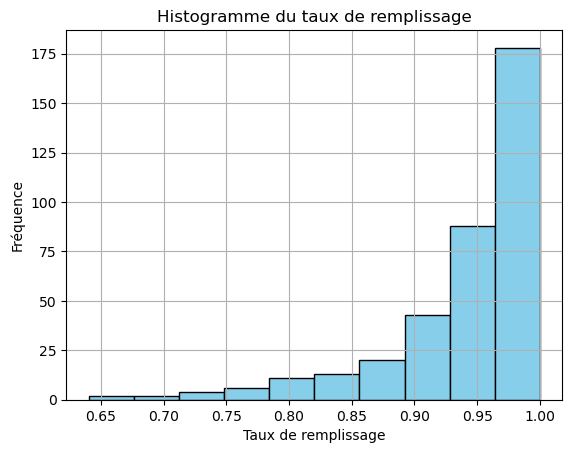

In [16]:
# Créer un histogramme de la colonne 'Fill Rate'
df['Fill Rate'].hist(bins=10, color='skyblue', edgecolor='black')

# Ajouter un titre et des étiquettes d'axes
plt.title('Histogramme du taux de remplissage')
plt.xlabel('Taux de remplissage')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()

### Suppression de Numéro 

In [17]:
df.drop("Numéro", axis = 1, inplace = True)

### Binarization

In [18]:
colonnes_oui_non = [
    'AnorexiedetypeboulemieActuel',
    'vomissementActuel(Nbrparjour)',
    'utilisationActuellaxatif',
    #'nomlaxatifActuel',
    'utilisationActuelDiurétique',
    'AnorexiedetyperestrictifActuel',
    'AnorexiedetypeboulemiePasse',
    'utilisationPasselaxatif',
    'AnorexiedetyperestrictifPasse',
    #'switch',
    'amenorheprimaire',
    'traitementcontraceptif',
    'Cyclesréguliers',
    'Signehyperandrogenie',
    'Hyperactivite'
]
for c in colonnes_oui_non:
    df[c] = df[c].apply(lambda x: 1 if x == "oui" else (0 if x == "non" else x))

In [19]:
"""
Binarisation des noms des actvités sportives selon la règle suivante : 
  - S'il s'agit d'une activité avec contrainte mécanique (impact au sol) alors 1
  - Sinon 0
"""

contraintes_mécaniques_faibles = ['aucune', 'natation', 'abdos', np.nan , 'auune', 'équitation', 'velo', 
                                  'ménage', 'escalade', "vélo d'appartement", 'vélo', 'abdo/fessier', 'velo (déplacement)', 
                                  'natation synchronisé (athlete de haut niveau)', 'piscine', '0', 
                                  'aquagym', 'velo/abdo/natation', 'abdominaux', 'voile', 'natation synchronisée', 'stretching. pilates', 
                                  'aviron', 'sport étude voile']

# Binarisation des colonnes selon les contraintes
df['ActivitePhysiqueActuelPratriquee1 h/s'] = df['ActivitePhysiqueActuelPratriquee1 h/s'].apply(lambda x: 0 if x in contraintes_mécaniques_faibles else 1)
df['ActivitePhysiquePassePratriquee1'] = df['ActivitePhysiquePassePratriquee1'].apply(lambda x: 0 if x in contraintes_mécaniques_faibles else 1)

In [20]:
df.head(5)

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Datedernièresmenstruations,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
0,16.586301,2008-11-28,1992-05-02,28881.7,-4.0,168.0,1.0,10.233029,26.0,-4.2,9.212018,16.463014,2008-10-14 00:00:00,48.0,-0.5,17.006803,15.460274,2007-10-14 00:00:00,38,2007-10-14 00:00:00,15.460274,1.126027,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,0.0,0,0,NaN,0.0,0.0,0.0,2008-03-01 00:00:00,9.066667,0.0,0.0,0,0.0,0,0,0,0,900,-23,0.91,131.0,120.0,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,111.1,126.9,119.00,8.3,9.4,8.85,1139.3,1122.1,1130.70,735.5,5.4,12585.3,314.1,258.7,286.40,6.8,5.9,6.35,3976.0,3813.0,3894.50,1546.3,6.1,22635.8,698.8,19.8,2418.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.07,6.290,12,35.8,3.72,96,11.8,130,8.8,6.3,NaN,0.894737
1,19.989041,2008-11-28,1988-12-07,37421.2,-2.5,164.0,0.1,13.913296,37.0,-2.5,13.756692,19.849315,2008-10-08 00:00:00,50.0,-0.5,18.590125,17.079452,2006-01-01 00:00:00,49,2008-07-01 00:00:00,19.578082,0.410959,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,0.0,0,0,12.5,0.0,1.0,0.0,2008-09-08 00:00:00,2.7,0.0,0.0,0,0.0,0,0,0,2,830,-32,0.64,128.0,83.0,NaN,NaN,NaN,8,2.53,34.87,22.51,1232.0,NaN,NaN,NaN,0.0,339.5,232.0,285.75,17.0,11.3,14.15,1524.4,1683.9,1604.15,1437.9,8.5,14848.9,1056.2,1315.5,1185.85,16.6,20.5,18.55,4923.5,4726.7,4825.10,4381.1,13.0,27707.4,725.4,19.4,2510.6,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.95,11.210,11.9,36.2,3.66,99,14.3,272,7.8,2.5,3.2,0.947368
2,18.076712,2008-06-04,1990-05-12,41838.5,-2.0,170.5,1.4,14.392205,35.4,-3.0,12.177398,18.169863,2008-07-08 00:00:00,54.0,0.0,18.575692,17.065753,2007-06-01 00:00:00,37.5,2007-10-01 00:00:00,17.4,0.676712,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,0.0,0,NaN,14,0.0,0.0,0.0,2007-07-01 00:00:00,11.3,0.0,0.0,0,1.0,1,2,1,2,930,-27,0.70,141.0,98.0,NaN,NaN,NaN,7,1.31,39.09,26.02,1321.0,NaN,NaN,NaN,-1.4,146.3,151.4,148.85,7.2,6.9,7.05,1760.2,1922.0,1841.10,940.4,4.6,19031.1,392.2,355.2,373.70,6.0,5.2,5.60,5846.2,6103.0,5974.60,1985.6,5.2,34662.4,744.9,19.7,2571.8,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.41,6.860,15,46,4.67,98,14,177,8.1,6.9,3.2,0.938596
3,16.495890,2009-01-07,1992-07-14,38538.5,-2.2,152.0,-1.8,16.680445,36.0,-1.0,15.581717,13.476712,2006-01-01 00:00:00,40.0,-1.5,17.313019,14.476712,2007-01-01 00:00:00,NaN,2008-07

### Types

In [21]:
colonnes_date =[
    'Dateexam',
    'DDN',
    'datePoidsleplusbas',
    'datePoidsleplushaut',
    'DatedebutTCA',
    'Datedernièresmenstruations'
]

colonnes_int = [
    'Numéro',
    'NbrdelaxatifjourActuel',
    'vomissementPasse(nbrparjour)',
    'NbrdelaxatifjourPasse',
    'nombreFracture',
    'cigarettes(nbrjour)',
    'SicyclesirréguliersNbrcycles/an',
    'NbrGrossesse',
    'NbrEnfant',
    'ActivitePhysiqueActuelPratriquee1NbrHparsemaine',
    'vitamine b12 pmol/l',
    'VGM fl',
    'plaquette 10^9/l',
    'ration patient kcal/j',
    'alcool(nbverredjour)'
]


In [22]:
df = df.replace(",", '.', regex=True)
df = df.replace("pas de donnée", np.nan)

In [23]:
# Convertir la colonne DatedebutTCA en datetime
df["DatedebutTCA"] = pd.to_datetime(df["DatedebutTCA"].replace("??", np.nan), format='%d/%m/%Y', errors='coerce')

# Remplacer les valeurs dans les colonnes AgedebutTCA et DuréeTCA
df["AgedebutTCA"] = df["AgedebutTCA"].replace("??", np.nan)
df['DuréeTCA'] = df['DuréeTCA'].replace('#valeur!', np.nan)

# Convertir la colonne Datedernièresmenstruations en datetime
df['Datedernièresmenstruations'] = pd.to_datetime(df['Datedernièresmenstruations'].replace("pas encore réglée", np.nan), format='%d/%m/%Y', errors='coerce')

# Remplacer les valeurs dans la colonne ActivitePhysiquePassePratriquee1NbrHsemaine
df['ActivitePhysiquePassePratriquee1NbrHsemaine'] = df['ActivitePhysiquePassePratriquee1NbrHsemaine'].replace('3(loisirs) + 3/j (prof)', 24).replace('1h30 + 1h', 2.5).replace('4.5+1.5', 6).replace('non déterminée', np.nan)

# Remplacer les valeurs dans la colonne Calorimétrie (calories/24h)
df['Calorimétrie (calories/24h)'] = df['Calorimétrie (calories/24h)'].replace('manque calo', np.nan).astype("float")

# Remplacer les valeurs dans la colonne pcCalorimétrienorme
df['pcCalorimétrienorme'] = df['pcCalorimétrienorme'].replace('manque calo', np.nan).astype("float")

# Convertir les colonnes numériques en types numériques
numeric_columns = df.columns.difference(colonnes_date)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='ignore')

# Convertir les colonnes de dates en datetime
df[colonnes_date] = df[colonnes_date].apply(lambda col: pd.to_datetime(col, format='%d/%m/%Y', errors='coerce'))

In [24]:
df.head(5)

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Datedernièresmenstruations,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
0,16.586301,2008-11-28,1992-05-02,28881.7,-4.0,168.0,1.0,10.233029,26.0,-4.2,9.212018,16.463014,2008-10-14,48.0,-0.5,17.006803,15.460274,2007-10-14,38.0,2007-10-14,15.460274,1.126027,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,0.0,0,0,NaN,0.0,0.0,0.0,2008-03-01,9.066667,0.0,0.0,0,0.0,0,0.0,0,0,900.0,-23.0,0.91,131.0,120.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,111.1,126.9,119.00,8.3,9.4,8.85,1139.3,1122.1,1130.70,735.5,5.4,12585.3,314.1,258.7,286.40,6.8,5.9,6.35,3976.0,3813.0,3894.50,1546.3,6.1,22635.8,698.8,19.8,2418.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.07,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,NaN,0.894737
1,19.989041,2008-11-28,1988-12-07,37421.2,-2.5,164.0,0.1,13.913296,37.0,-2.5,13.756692,19.849315,2008-10-08,50.0,-0.5,18.590125,17.079452,2006-01-01,49.0,2008-07-01,19.578082,0.410959,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,0.0,0,0,12.5,0.0,1.0,0.0,2008-09-08,2.700000,0.0,0.0,0,0.0,0,0.0,0,2,830.0,-32.0,0.64,128.0,83.0,NaN,NaN,NaN,8.0,2.53,34.87,22.51,1232.0,NaN,NaN,NaN,0.0,339.5,232.0,285.75,17.0,11.3,14.15,1524.4,1683.9,1604.15,1437.9,8.5,14848.9,1056.2,1315.5,1185.85,16.6,20.5,18.55,4923.5,4726.7,4825.10,4381.1,13.0,27707.4,725.4,19.4,2510.6,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.95,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2,0.947368
2,18.076712,2008-06-04,1990-05-12,41838.5,-2.0,170.5,1.4,14.392205,35.4,-3.0,12.177398,18.169863,2008-07-08,54.0,0.0,18.575692,17.065753,2007-06-01,37.5,2007-10-01,17.400000,0.676712,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,0.0,0,NaN,14,0.0,0.0,0.0,2007-07-01,11.300000,0.0,0.0,0,1.0,1,2.0,1,2,930.0,-27.0,0.70,141.0,98.0,NaN,NaN,NaN,7.0,1.31,39.09,26.02,1321.0,NaN,NaN,NaN,-1.4,146.3,151.4,148.85,7.2,6.9,7.05,1760.2,1922.0,1841.10,940.4,4.6,19031.1,392.2,355.2,373.70,6.0,5.2,5.60,5846.2,6103.0,5974.60,1985.6,5.2,34662.4,744.9,19.7,2571.8,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.41,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2,0.938596
3,16.495890,2009-01-07,1992-07-14,38538.5,-2.2,152.0,-1.8,16.680445,36.0,-1.0,15.581717,13.476712,2006-01-01,40.0,-1.5,17.313019,14.476712,2007-01-01,NaN,2008-07-12,16.005479,0.490411,0,0,0,0.0,1,0.0,0.0,0.0,1,0.0,.,NaN,NaN,

### Data unities

In [25]:
df['PoidsT1'] = np.round(df['PoidsT1']/1000, 1)

### Data imputing

In [26]:
df.isnull().sum()

Age                                                  0
Dateexam                                             0
DDN                                                  0
PoidsT1                                              0
PoidsSD                                              0
TailleT1                                             0
TailleSD                                             0
IMC1                                                 0
Poidsleplusbas                                       6
DSPoidsleplusbas                                    11
IMCpoidsleplusbas                                    2
Agepoidsleplusbas                                   16
datePoidsleplusbas                                  18
Poidsleplushaut                                     14
DSPoidsleplushaut                                   19
IMCpoidsleplushaut                                   7
Agepoidsleplushaut                                  20
datePoidsleplushaut                                 21
Poids6mois

### Alcool

In [27]:
# Remplacer les valeurs NaN par 0
df['alcool(nbverredjour)'].fillna(0, inplace=True)

# Remplacer la valeur texte "1 verre de vin 2-3/semaine" par 0.6
df['alcool(nbverredjour)'].replace("1 verre de vin 2-3/semaine", 0.6, inplace=True)

# Remplacer la valeur texte "1 verre de vin 2-3/semaine" par 0.6
df['alcool(nbverredjour)'].replace("mésusage", 0, inplace=True)

### Vomissement Actuel

In [28]:
# Remplacer les valeurs NaN par 0
df['vomissementActuel(Nbrparjour)'].fillna(0, inplace=True)

# Remplacer la valeur texte "non" par 0
df['vomissementActuel(Nbrparjour)'].replace("non", 0, inplace=True)

# Remplacer la valeur texte "occasionnel" par 0.5
df['vomissementActuel(Nbrparjour)'].replace("occasionnel", 0.5, inplace=True)

# Remplacer la valeur texte "oui" par 1
df['vomissementActuel(Nbrparjour)'].replace("oui", 1, inplace=True)

### Utilisation Actuel Diurétique

In [29]:
# Remplacer les valeurs NaN par non
df['utilisationActuelDiurétique'].fillna('non', inplace=True)

### Drogues

In [30]:
df['Drogues'] = df['Drogues'].replace('non', 0)
df['Drogues'] = df['Drogues'].replace('1 joint le soir', 2)
df['Drogues'] = df['Drogues'].replace('cannabis 2/jour', 6)
df['Drogues'] = df['Drogues'].replace('passée  cannabis / mdma actuelle cocaine rare', 10)
df['Drogues'] = df['Drogues'].replace('conso* de cocaine au passé', 4)
df['Drogues'] = df['Drogues'].replace('cannabis 1/mois pendant 4ans', 2)
df['Drogues'] = df['Drogues'].replace('thc en sorties', 4)
df['Drogues'] = df['Drogues'].replace('thc dans le passé 5/jour', 5)
df['Drogues'] = df['Drogues'].replace('cannabis mais arret depuis 1mois', 4)
df['Drogues'] = df['Drogues'].replace('thc occasionnel', 4)
df['Drogues'] = df['Drogues'].fillna(0)

Ce qui a été fait ici : 

Pour les colonnes à 80% remplie :
    - Je regarde les valeurs uniques, si possible je remplace les valeurs aberrantes du type ("pas de données", "."...). Sinon je prends note, et la question sera posée à la prochaine réunion. 
    - Je convertie les colonnes "propres" avec le bon format (float ou datetime).

In [32]:
colonnes_relatives = ['Numéro', 'Poidsleplusbas', 'DSPoidsleplusbas', 
                     'IMCpoidsleplusbas', 'Agepoidsleplusbas', 'datePoidsleplusbas', 
                      'Poidsleplushaut', 'DSPoidsleplushaut', 'IMCpoidsleplushaut', 
                      'IMCpoidsleplushaut', 'Agepoidsleplushaut', 'datePoidsleplushaut', 
                      'Poids6mois', 'DatedebutTCA', 'AgedebutTCA', 'DuréeTCA', 'Datedernièresmenstruations', 
                      'Duréemoisdepuisdernièresmenstruations', 'Tour de taille', 'Tour de hanche', 'rapport taille/hanche', 
                      'Lip(%)', 'Glu(%)', 'Pro(%)']

colonnes_activites_relatives = ['ActivitePhysiqueActuelPratriquee1NbrHparsemaine', 
                      'ActivitePhysiquePassePratriquee1NbrHsemaine']

In [33]:
df['TSH(mIU/l)'] = df['TSH(mIU/l)'].replace('0.9090µui/ml', 0)

df['TSH(mIU/l)'] = df['TSH(mIU/l)'].replace(',', '.').astype("float64")

In [34]:
def imputer_par_mediane_colonnes_numeriques(df):
    """
    Impute les valeurs manquantes par la médiane pour les colonnes numériques du DataFrame.

    Paramètres :
    - df : pandas.DataFrame
        Le DataFrame d'entrée.

    Retour :
    - pandas.DataFra`me
        Le DataFrame avec les valeurs manquantes imputées par la médiane.
    """
    # Sélectionner les colonnes numériques avec des valeurs manquantes
    colonnes_numeriques_manquantes = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isnull().any()]
    
    colonnes_numeriques_manquantes = colonnes_numeriques_manquantes.difference(colonnes_relatives)
    colonnes_numeriques_manquantes = colonnes_numeriques_manquantes.difference(colonnes_activites_relatives)

    # Imputer les valeurs manquantes par la médiane
    df[colonnes_numeriques_manquantes] = df[colonnes_numeriques_manquantes].apply(lambda col: col.fillna(col.median()), axis=0)

    return df

# Appliquer la fonction à votre DataFrame
df = imputer_par_mediane_colonnes_numeriques(df)

#### Valeurs de références

In [35]:
# Imputation des valeurs de PoidsT1 qui sont aberrantes (0) par la valeur médiane
df['PoidsT1'] = df['PoidsT1'].replace(0, np.nan)
df['PoidsT1'] = df['PoidsT1'].replace(0.1, np.nan)
df['PoidsT1'] = df['PoidsT1'].fillna(df['PoidsT1'].median())

# Imputation des valeurs de IMC1 qui sont aberrantes (0) par la valeur médiane
df['IMC1'] = df['IMC1'].replace(0, np.nan)
df['IMC1'] = df['IMC1'].replace(0.02, np.nan)
df['IMC1'] = round(df['IMC1'].fillna(df['IMC1'].median()), 2)

df['IMCpoidsleplusbas'] = df['IMCpoidsleplusbas'].replace(0, np.nan)
df['IMCpoidsleplushaut'] = df['IMCpoidsleplushaut'].replace(0, np.nan)

# Imputation des valeurs de Agepoidsleplusbas qui sont aberrantes (0) par la valeur médiane
df['Agepoidsleplusbas'] = df['Agepoidsleplusbas'].replace('plusieurs reprises', np.nan)
df['Agepoidsleplusbas'] = df['Agepoidsleplusbas'].replace('-97.36', np.nan)

df['Agepoidsleplusbas'] = round(df['Agepoidsleplusbas'].astype('float'), 1)


In [36]:
df = df.dropna(subset=['AgedebutTCA'])

#### Imputation des colonnes relatives

In [37]:
# colonne Poidsleplusbas
rapport_ecart_poids_plus_bas = (df['Poidsleplusbas'] / df['PoidsT1']).mean(skipna=True)
print(rapport_ecart_poids_plus_bas)
df['Poidsleplusbas'] = np.round(df['Poidsleplusbas'].fillna(df['PoidsT1'] * rapport_ecart_poids_plus_bas), 2)

# colonne Poidsleplushaut
rapport_ecart_poids_plus_haut = (df['Poidsleplushaut'] / df['PoidsT1']).mean(skipna=True)
print(rapport_ecart_poids_plus_haut)
df['Poidsleplushaut'] = np.round(df['Poidsleplushaut'].fillna(df['PoidsT1'] * (rapport_ecart_poids_plus_bas)), 2)

# colonne Poids6mois
rapport_ecart_poids_6mois = (df['PoidsT1'] / df['Poids6mois']).mean(skipna=True)
print(rapport_ecart_poids_6mois)
df['Poids6mois'] = np.round(df['Poids6mois'].fillna(df['PoidsT1'] * (rapport_ecart_poids_6mois)), 2)

# colonne DSPoidsleplusbas
df['DSPoidsleplusbas'] = np.round(df['DSPoidsleplusbas'].fillna(df['PoidsT1'] / rapport_ecart_poids_plus_bas), 2)

# colonne DSPoidsleplushaut
df['DSPoidsleplushaut'] = np.round(df['DSPoidsleplushaut'].fillna(df['PoidsT1'] / (rapport_ecart_poids_plus_bas)), 2)

# colonne IMCpoidsleplusbas
rapport_IMC_poids_plus_bas = (df['IMCpoidsleplusbas'] / df['IMC1']).mean(skipna=True)
print(rapport_IMC_poids_plus_bas)
df['IMCpoidsleplusbas'] = np.round(df['IMCpoidsleplusbas'].fillna(df['IMC1'] * rapport_IMC_poids_plus_bas), 2)

# colonne IMCpoidsleplushaut
rapport_IMC_poids_plus_haut = (df['IMCpoidsleplushaut'] / df['IMC1']).mean(skipna=True)
print(rapport_IMC_poids_plus_haut)
df['IMCpoidsleplushaut'] = np.round(df['IMCpoidsleplushaut'].fillna(df['IMC1'] * rapport_IMC_poids_plus_haut), 2)


0.931259584561446
1.321064888906074
0.9479853532834435
4.917238689330307
6.899748586204533


In [38]:
# colonne Agepoidsleplusbas
pourcentage_age_plus_bas = (df['Agepoidsleplusbas'] / df['AgedebutTCA']).mean(skipna=True)
print(pourcentage_age_plus_bas)
df['Agepoidsleplusbas'] = df['Agepoidsleplusbas'].fillna(df['AgedebutTCA'] * pourcentage_age_plus_bas)
# Si Agepoidsleplusbas imputé est supérieur à Age (actuel), ce n'est pas bon, donc on remplace Agepoidsleplusbas pas Age
df['Agepoidsleplusbas'] = np.where(df['Agepoidsleplusbas'] >= df['Age'],
                                    df['Age'],
                                    df['Agepoidsleplusbas'])

# colonne Agepoidsleplushaut
pourcentage_age_plus_haut = (df['Agepoidsleplushaut'] / df['AgedebutTCA']).mean(skipna=True)
print(pourcentage_age_plus_haut)
df['Agepoidsleplushaut'] = np.round(df['Agepoidsleplushaut'].fillna(df['AgedebutTCA'] * pourcentage_age_plus_haut), 1)
# Si Agepoidsleplushaut imputé est supérieur à Age (actuel), ce n'est pas bon, donc on remplace Agepoidsleplushaut pas Age
df['Agepoidsleplushaut'] = np.round(np.where(df['Agepoidsleplushaut'] >= df['Age'],
                                            df['Age'],
                                            df['Agepoidsleplushaut']), 1)

# colonne datePoidsleplusbas
rows_with_date_nulls = df[df['datePoidsleplusbas'].isnull()]
df['DatedebutTCA'] = pd.to_numeric(df['DatedebutTCA'], errors='coerce')
for i in rows_with_date_nulls.index:
    df.at[i, 'datePoidsleplusbas'] = pd.to_datetime(df.at[i, 'Agepoidsleplusbas'] * df.at[i, 'DatedebutTCA'] / df.at[i, 'AgedebutTCA'])
df['datePoidsleplusbas'] = pd.to_datetime(df['datePoidsleplusbas']).dt.date
df['DatedebutTCA'] = pd.to_datetime(df['DatedebutTCA'])

rows_with_date_nulls = df[df['datePoidsleplushaut'].isnull()]
df['DatedebutTCA'] = pd.to_numeric(df['DatedebutTCA'], errors='coerce')
for i in rows_with_date_nulls.index:
    df.at[i, 'datePoidsleplushaut'] = pd.to_datetime(df.at[i, 'Agepoidsleplushaut'] * df.at[i, 'DatedebutTCA'] / df.at[i, 'AgedebutTCA'])
df['datePoidsleplushaut'] = pd.to_datetime(df['datePoidsleplushaut']).dt.date
df['DatedebutTCA'] = pd.to_datetime(df['DatedebutTCA'])


1.1573077703175365
1.0187938246955726


In [39]:
print(df['datePoidsleplushaut'].dtype)

object


### FracturedefaibleeNRJ1 processing

In [40]:
df['nombreFracture'].value_counts()

nombreFracture
0.0    279
1.0     63
2.0     14
3.0      7
8.0      1
5.0      1
4.0      1
Name: count, dtype: int64

In [41]:
df['FracturedefaibleeNRJ1'] = df['FracturedefaibleeNRJ1'].replace('.', 0).replace('non', 1).replace('oui', 2).replace('non+oui+oui', 2).replace('?', np.nan)

df.loc[df['nombreFracture'] == 0, 'FracturedefaibleeNRJ1'] = 0

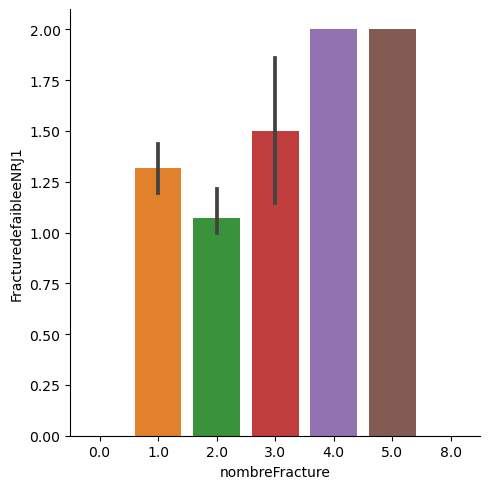

In [42]:
sns.catplot(x = 'nombreFracture', y = 'FracturedefaibleeNRJ1', data = df, kind = 'bar')

In [43]:
df.loc[(df['nombreFracture'] < 4) & (df['FracturedefaibleeNRJ1'].isna()), 'FracturedefaibleeNRJ1'] = 1
df.loc[(df['nombreFracture'] >= 4) & (df['FracturedefaibleeNRJ1'].isna()), 'FracturedefaibleeNRJ1'] = 2

Cette colonne a été encodée par niveau de gravité des fractures passées : 
Si la patiente n'a pas eu de fracture par la passé, FracturedefaibleeNRJ1 vaut 0 par défaut.
Si la patiente a eu des fractures non graves, FracturedefaibleeNRJ1 vaut 1. 
Sinon FracturedefaibleeNRJ1 vaut 2 pour des fractures graves. 

Pour les valeurs manquantes, on affiche un barplot représentant la répartition de FracturedefaibleeNRJ1 par nombreFracture. On remarque ainsi que pour un nombre de Fracture >= 4, la gravité est mise à 2.
On impute alors les valeurs manquantes de FracturedefaibleeNRJ1 selon la règle suivante : 
- si nombreFracture < 4, FracturedefaibleeNRJ1 = 1
- sinon, FracturedefaibleeNRJ1 = 2.

### iPTHT1 (pg/ml)  & 25OHT1 (ng/ml)    

In [44]:
df['iPTHT1 (pg/ml)'].unique()
df['iPTHT1 (pg/ml)'] = df['iPTHT1 (pg/ml)'].replace('supplémentation vit d', np.nan)
df['iPTHT1 (pg/ml)'] = df['iPTHT1 (pg/ml)'].fillna(df['iPTHT1 (pg/ml)'].median(skipna=True)).astype('float64')

In [45]:
df['25OHT1 (ng/ml)'].unique()
df['25OHT1 (ng/ml)'] = df['25OHT1 (ng/ml)'].replace('supplémentation vit d', np.nan)
df['25OHT1 (ng/ml)'] = df['25OHT1 (ng/ml)'].fillna(df['25OHT1 (ng/ml)'].median(skipna=True)).astype('float64')

Les valeurs manquantes de ces colonnes sont imputées par la valeur médiane des valeurs présentes, puis les colonnes sont converties en objet float64.

### ActivitePhysiqueActuelPratriquee1NbrHparsemaine & ActivitePhysiquePassePratriquee1NbrHsemaine

In [46]:
df['ActivitePhysiquePassePratriquee1NbrHsemaine'].unique()
df['ActivitePhysiquePassePratriquee1NbrHsemaine'] = df['ActivitePhysiquePassePratriquee1NbrHsemaine'].replace('toute la journée', 12).replace('non determinee', np.nan).astype("float64")


In [47]:
print(df[df['ActivitePhysiqueActuelPratriquee1 h/s'] == 0]['ActivitePhysiqueActuelPratriquee1NbrHparsemaine'].median(skipna= True))
print(df[df['ActivitePhysiqueActuelPratriquee1 h/s'] == 1]['ActivitePhysiqueActuelPratriquee1NbrHparsemaine'].median(skipna= True))

print(df[df['ActivitePhysiquePassePratriquee1'] == 0]['ActivitePhysiquePassePratriquee1NbrHsemaine'].median(skipna= True))
print(df[df['ActivitePhysiquePassePratriquee1'] == 1]['ActivitePhysiquePassePratriquee1NbrHsemaine'].median(skipna= True))

0.0
3.0
0.0
4.0


In [48]:
df['ActivitePhysiqueActuelPratriquee1 h/s'].unique()
df.loc[(df['ActivitePhysiqueActuelPratriquee1 h/s'] == 0) & (df['ActivitePhysiqueActuelPratriquee1NbrHparsemaine'].isna()), 'ActivitePhysiqueActuelPratriquee1NbrHparsemaine'] = 0
df.loc[(df['ActivitePhysiqueActuelPratriquee1 h/s'] == 1)& (df['ActivitePhysiqueActuelPratriquee1NbrHparsemaine'].isna()), 'ActivitePhysiqueActuelPratriquee1NbrHparsemaine'] = 3
df.loc[(df['ActivitePhysiquePassePratriquee1'] == 0) & (df['ActivitePhysiquePassePratriquee1NbrHsemaine'].isna()), 'ActivitePhysiquePassePratriquee1NbrHsemaine'] = 1.5
df.loc[(df['ActivitePhysiquePassePratriquee1'] == 1) & (df['ActivitePhysiquePassePratriquee1NbrHsemaine'].isna()), 'ActivitePhysiquePassePratriquee1NbrHsemaine'] = 4


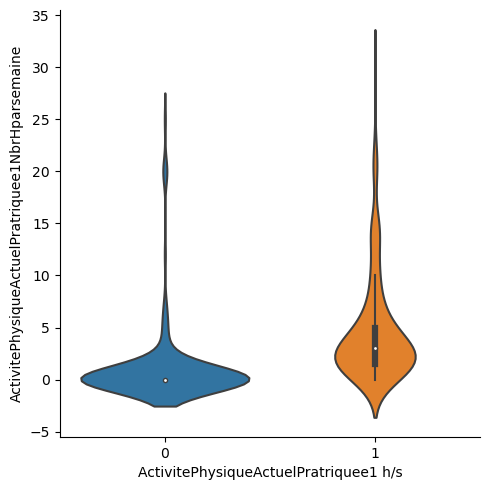

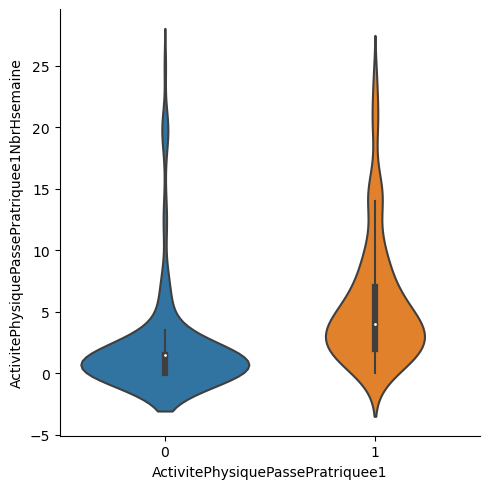

In [49]:
sns.catplot(x = 'ActivitePhysiqueActuelPratriquee1 h/s', y = 'ActivitePhysiqueActuelPratriquee1NbrHparsemaine', data = df, 
           kind = "violin")
plt.show()

sns.catplot(x = 'ActivitePhysiquePassePratriquee1', y = 'ActivitePhysiquePassePratriquee1NbrHsemaine', data = df, 
           kind = "violin")
plt.show()

### Age de la menarche

In [50]:
df['Agedelamenarche'].unique()
df['Agedelamenarche'] = df['Agedelamenarche'].replace('non encore réglée', np.nan).replace('pas encore réglée', np.nan).replace('?', np.nan)
df['Agedelamenarche'] = df['Agedelamenarche'].fillna(df['Age'])

### NbrEnfant

In [51]:
df['NbrEnfant'].fillna(0, inplace = True)

### Tour de taille, tour de hanche

In [52]:
# Sélection des colonnes numériques
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns.tolist()

columns_to_include = [col for col in colonnes_numeriques if col not in colonnes_date]

# Calcul des corrélations
correlations = df[columns_to_include].corr()['Tour de hanche'].sort_values(ascending=False).head(4)
correlations

Tour de hanche    1.000000
PoidsSD           0.591854
Tour de taille    0.569728
IMC1              0.471889
Name: Tour de hanche, dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()

# Indice des valeurs manquantes
df1 = df.dropna(subset=['Tour de taille'])
df_manquant = df[df['Tour de taille'].isnull()]

rg.fit(df1[['IMC1']], df1['Tour de taille'])

y_pred = rg.predict(df_manquant[['IMC1']])

# Convert the predicted values to integers
y_pred_int = y_pred.astype(int)

df.loc[df['Tour de taille'].isnull(), 'Tour de taille'] = y_pred_int

####### Tour de hanche ##########
rg = LinearRegression()

# Indice des valeurs manquantes
df1 = df.dropna(subset=['Tour de hanche'])
df_manquant = df[df['Tour de hanche'].isnull()]

rg.fit(df1[['IMC1', 'PoidsSD']], df1['Tour de hanche'])

y_pred = rg.predict(df_manquant[['IMC1', 'PoidsSD']])

# Convert the predicted values to integers
y_pred_int = y_pred.astype(int)

df.loc[df['Tour de hanche'].isnull(), 'Tour de hanche'] = y_pred_int


In [54]:
df['rapport taille/hanche'] = df['rapport taille/hanche'].replace('#div/0!', np.nan)
df['rapport taille/hanche'] = df['rapport taille/hanche'].fillna(np.round(df['Tour de taille']/df['Tour de hanche'], 2))

In [55]:
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Datedernièresmenstruations,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,9.21,16.500000,2008-10-14,48.0,-0.5,17.01,15.5,2007-10-14,38.0,2007-10-14,15.460274,1.126027,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,16.586301,0.0,0.0,0.0,2008-03-01,9.066667,0.0,0.0,0,0.0,0,0.0,0,0.0,900.0,-23.0,0.91,131.0,120.0,NaN,NaN,NaN,16.0,8.30,34.60,17.60,1179.0,53.0,68.0,0.78,-2.5,111.1,126.9,119.00,8.3,9.4,8.85,1139.3,1122.1,1130.70,735.5,5.4,12585.3,314.1,258.7,286.40,6.8,5.9,6.35,3976.0,3813.0,3894.50,1546.3,6.1,22635.8,698.8,19.8,2418.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.070,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3,0.894737
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,13.76,19.800000,2008-10-08,50.0,-0.5,18.59,17.1,2006-01-01,49.0,2008-07-01,19.578082,0.410959,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.500000,0.0,1.0,0.0,2008-09-08,2.700000,0.0,0.0,0,0.0,0,0.0,0,2.0,830.0,-32.0,0.64,128.0,83.0,NaN,NaN,NaN,8.0,2.53,34.87,22.51,1232.0,59.0,74.0,0.80,0.0,339.5,232.0,285.75,17.0,11.3,14.15,1524.4,1683.9,1604.15,1437.9,8.5,14848.9,1056.2,1315.5,1185.85,16.6,20.5,18.55,4923.5,4726.7,4825.10,4381.1,13.0,27707.4,725.4,19.4,2510.6,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.950,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2,0.947368
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,12.18,18.076712,2008-07-08,54.0,0.0,18.58,17.1,2007-06-01,37.5,2007-10-01,17.400000,0.676712,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,0.0,0.0,2007-07-01,11.300000,0.0,0.0,0,1.0,1,2.0,1,2.0,930.0,-27.0,0.70,141.0,98.0,NaN,NaN,NaN,7.0,1.31,39.09,26.02,1321.0,60.0,76.0,0.79,-1.4,146.3,151.4,148.85,7.2,6.9,7.05,1760.2,1922.0,1841.10,940.4,4.6,19031.1,392.2,355.2,373.70,6.0,5.2,5.60,5846.2,6103.0,5974.60,1985.6,5.2,34662.4,744.9,19.7,2571.8,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.410,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2,0.938596
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,15.58,13.500000,2006-01-01,40.0,-1.5,17.31,14.5,2007-01-01,36.5,2008-07-12,16.005479,0.490411,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.00

### Glucide, Lipide et Protéine (%)

Glu(%)           1.000000
QR               0.898407
VCO2(ml/min)     0.449683
MaigreTroncT1    0.194028
Name: Glu(%), dtype: float64


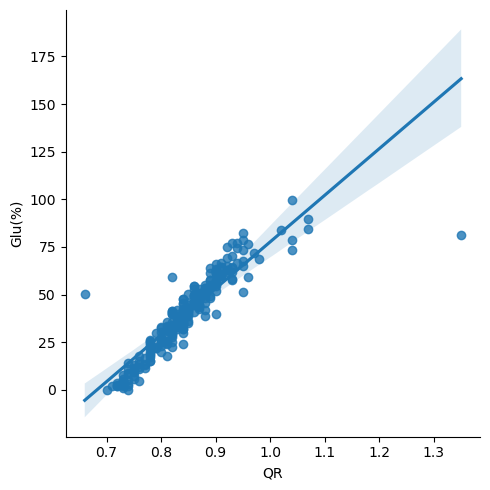

In [56]:
correlations = df[columns_to_include].corr()['Glu(%)'].sort_values(ascending = False).head(4)
print(correlations)

sns.lmplot(x='QR', y='Glu(%)', data=df)

In [57]:
rg = LinearRegression()

df1 = df.dropna(subset=['Glu(%)'])
df_manquant = df[df['Glu(%)'].isnull()]

rg.fit(df1[['QR']], df1['Glu(%)'])
X_test = df.loc[df['Glu(%)'].isna(), 'QR'].values.reshape(-1, 1)

y_pred = rg.predict(X_test)

df.loc[df['Glu(%)'].isnull(), 'Glu(%)'] = y_pred

In [58]:
df['Glu(%)'] = df['Glu(%)'].apply(lambda x: max(0, x))

Pro(%)                            1.000000
AzUr(g/j)                         0.892394
AnorexiedetyperestrictifActuel    0.238064
AnorexiedetyperestrictifPasse     0.173195
Name: Pro(%), dtype: float64


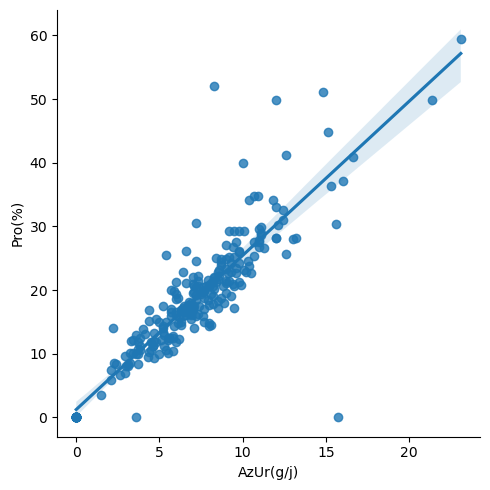

In [59]:
correlations = df[columns_to_include].corr()['Pro(%)'].sort_values(ascending = False).head(4)
print(correlations)

sns.lmplot(x='AzUr(g/j)', y='Pro(%)', data=df)
plt.show()

rg = LinearRegression()

df1 = df.dropna(subset=['Pro(%)'])
df_manquant = df[df['Pro(%)'].isnull()]
rg.fit(df1[['AzUr(g/j)']], df1['Pro(%)'])
X_test = df.loc[df['Pro(%)'].isna(), 'AzUr(g/j)'].values.reshape(-1, 1)

y_pred = rg.predict(X_test)

df.loc[df['Pro(%)'].isnull(), 'Pro(%)'] = y_pred

In [60]:
df['Lip(%)'] = df['Lip(%)'].fillna(np.round(100 - df['Pro(%)'] - np.round(df['Glu(%)']), 2))

In [61]:
df.isna().sum()

Age                                                 0
Dateexam                                            0
DDN                                                 0
PoidsT1                                             0
PoidsSD                                             0
TailleT1                                            0
TailleSD                                            0
IMC1                                                0
Poidsleplusbas                                      0
DSPoidsleplusbas                                    0
IMCpoidsleplusbas                                   0
Agepoidsleplusbas                                   0
datePoidsleplusbas                                  0
Poidsleplushaut                                     0
DSPoidsleplushaut                                   0
IMCpoidsleplushaut                                  0
Agepoidsleplushaut                                  0
datePoidsleplushaut                                 0
Poids6mois                  

### Menstruations

In [62]:
df['Diff_mois'] = ((df['Dateexam'] - df['DDN']) // pd.Timedelta(days=30))-180
df.loc[(df['amenorheprimaire'] == 1.0) & (df['Duréemoisdepuisdernièresmenstruations'].isnull()), 'Duréemoisdepuisdernièresmenstruations'] = df['Diff_mois']
df.drop(columns=['Diff_mois'], inplace=True)

df['Diff'] = ((df['Dateexam'] - df['Datedernièresmenstruations']) // pd.Timedelta(days=30))
df.loc[(df['Datedernièresmenstruations'].notnull()) & (df['Duréemoisdepuisdernièresmenstruations'].isnull()), 'Duréemoisdepuisdernièresmenstruations'] = df['Diff']
df.drop(columns=['Diff'], inplace=True)

df.loc[(df['Cyclesréguliers'] == 1.0) & (df['Duréemoisdepuisdernièresmenstruations'].isnull()), 'Duréemoisdepuisdernièresmenstruations'] = 0.5

df.loc[(df['Age']< 18.0) & (df['Duréemoisdepuisdernièresmenstruations'].isnull()), 'Duréemoisdepuisdernièresmenstruations'] = 0

df['Duréemoisdepuisdernièresmenstruations'].fillna(0, inplace=True)
df['Duréemoisdepuisdernièresmenstruations'][df['Duréemoisdepuisdernièresmenstruations'] < 0] = 0

In [63]:
df.drop(columns=['Datedernièresmenstruations'], inplace=True)

In [64]:
df.isna().sum()

Age                                                0
Dateexam                                           0
DDN                                                0
PoidsT1                                            0
PoidsSD                                            0
TailleT1                                           0
TailleSD                                           0
IMC1                                               0
Poidsleplusbas                                     0
DSPoidsleplusbas                                   0
IMCpoidsleplusbas                                  0
Agepoidsleplusbas                                  0
datePoidsleplusbas                                 0
Poidsleplushaut                                    0
DSPoidsleplushaut                                  0
IMCpoidsleplushaut                                 0
Agepoidsleplushaut                                 0
datePoidsleplushaut                                0
Poids6mois                                    

### Save Dataset

In [65]:
df.to_csv('Data.csv', index=False)